In [1]:
import random
import torch
import matplotlib.pyplot as plt
import supervision as sv
import numpy as np
import cv2
import shutil


from pathlib import Path
from ultralytics import YOLO

In [2]:
MODEL_PATH = Path("runs/detect/train4/weights/best.pt")
VAL_IMAGES_DIR = Path("data/tracking/YOLO/images/val")
VIDEO_OUT_DIR = Path("videos")
VIDEO_OUT_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

model = YOLO(str(MODEL_PATH))
model.to(device)
print("Loaded model from:", MODEL_PATH)

names = model.names  
print("Classes:", names)

Using device: cuda
Loaded model from: runs/detect/train4/weights/best.pt
Classes: {0: 'player', 1: 'referee', 2: 'ball', 3: 'goalkeeper'}


Inference on: SNMOT-169_000294.jpg


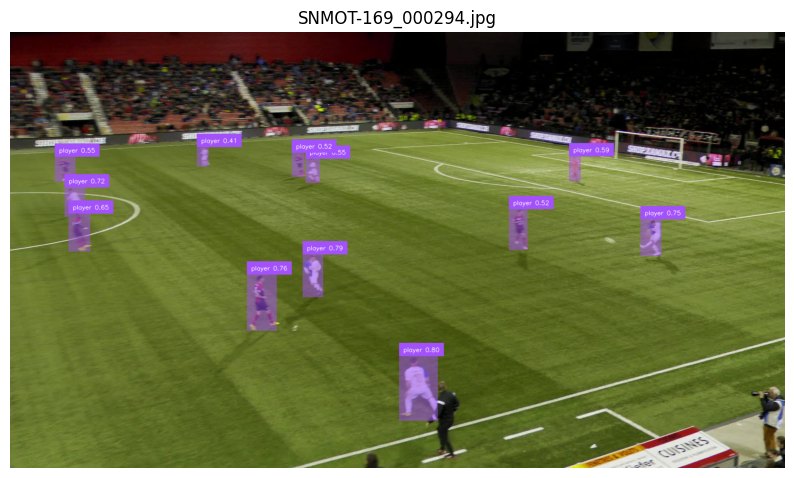

In [7]:
img_path = random.choice(list(Path(VAL_IMAGES_DIR).glob("*.jpg")))
print("Inference on:", img_path.name)

result = model(str(img_path), imgsz=640, device=device, verbose=False)[0]

detections = sv.Detections.from_ultralytics(result)

labels = [
    f"{names[int(cls_id)]} {conf:.2f}"
    for cls_id, conf in zip(detections.class_id, detections.confidence)
]

image_bgr = cv2.imread(str(img_path))

color_annotator = sv.ColorAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_bgr = color_annotator.annotate(
    scene=image_bgr.copy(),
    detections=detections
)
annotated_bgr = label_annotator.annotate(
    scene=annotated_bgr,
    detections=detections,
    labels=labels
)

annotated_rgb = cv2.cvtColor(annotated_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(annotated_rgb)
plt.axis("off")
plt.title(img_path.name)
plt.show()